# **Chordal Graphs Coloring**

## **Theoretical background**

### **Chordal graphs**

A **chord** is an edge that connects two non-consecutive vertices in a cycle.

In other words, a chord cuts across a cycle, creating smaller cycles inside it.

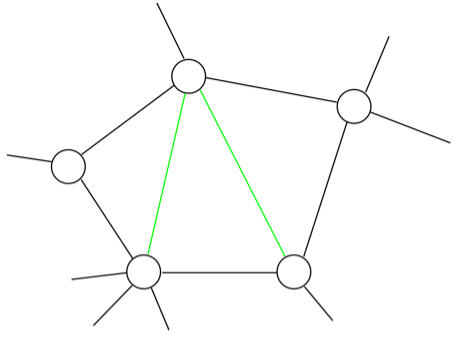

A **chordal graph** (also called a **triangulated graph**) is a **simple undirected graph where every cycle of length greater than 3 has at least one chord**.

**Properties of chordal graphs:**
- Every **induced subgraph** of a chordal graph is chordal.
- For each vertex `v`, there exists a **simplicial vertex** (a vertex whose neighbours form a clique) among the vertices furthest from `v` (Voloshin, 1982).
- **Dirac's Theorem (1961)**: A simple undirected graph is chordal if and only if it has **Perfect Elimination Ordering (PEO)**.

### **Perfect Elimination Ordering (PEO)**

**PEO** is an ordering of all vertices `v_1`, `v_2`, ..., `v_n` such that each vertex `v_i` is simplicial in the subgraph induced by the first `i` vertices.

In other words, when we remove vertices in **reverse PEO order**, each removed vertex’s neighbours form a **clique**.

### **Lexicographic Breadth-First Search (LexBFS)**

**LexBFS** is a graph traversal algorithm similar to classical BFS, but instead of using a queue, it selects vertices based on lexicographically largest labels (like in dictionary).

**Idea:**
1. Each vertex has an empty label initially.
2. At each step, choose an unvisited vertex with the **largest label in lexicographical order**.
3. Append the current step number to the labels of its unvisited neighbours.

**Result:** For chordal graphs, reversing the LexBFS order yields a PEO.

**A graph is chordal if and only if a reversed LexBFS ordering is a Perfect Elimination Ordering (PEO).**

### **Greedy Coloring Algorithm**

**Greedy coloring** assigns colors to vertices in a given sequence (e.g. PEO) by taking the smallest color not used by neighbours already coloured.

In general graphs, greedy coloring **may not be optimal**, but for **chordal graphs**, using a **PEO** guarantees **optimal coloring**.

## **Examples of chordal graphs**

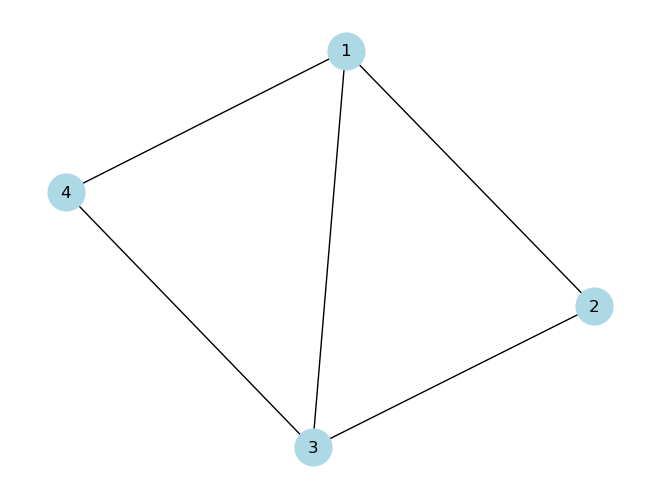

In [4]:
G1 = Graph()
edges1 = [(1,2), (2,3), (3,4), (4,1), (1,3)]
for e in edges1:
    G1.add_edge(e)
G1.plot()

Every cycle of length 4 has a chord (edge 1–3).

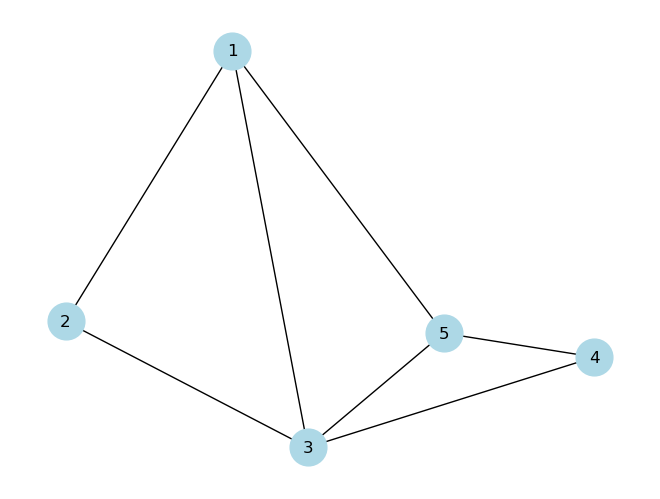

In [5]:
G2 = Graph()
edges2 = [(1,2), (2,3), (3,4), (4,5), (5,1), (1,3), (3,5)]
for e in edges2:
    G2.add_edge(e)
G2.plot()

The 5-cycle is broken by chords into triangles, so no induced cycle longer than 3 remains.

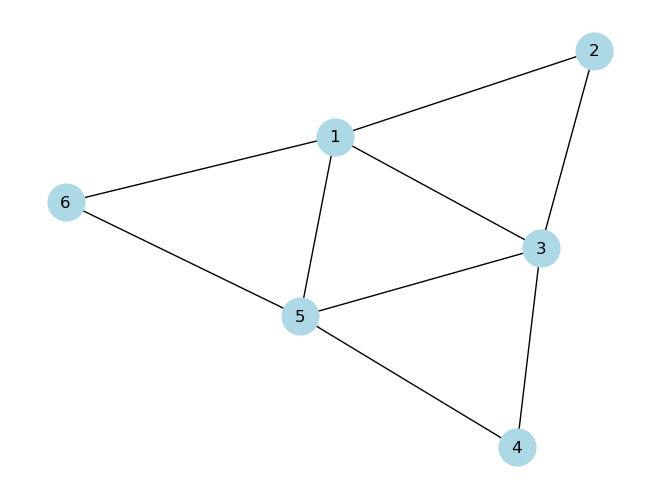

In [6]:
G3 = Graph()
edges3 = [
    (1,2), (2,3), (3,4), (4,5), (5,6), (6,1),
    (1,3), (3,5), (5,1)]
for e in edges3:
    G3.add_edge(e)
G3.plot()

All long cycles are triangulated by chords, so the graph has no induced cycle of length ≥ 4.

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import networkx as nx

In [3]:
class Graph:

    def __init__(self, graph=None):
        if graph is None:
            graph = {}
        self.graph = graph

    def add_vertex(self, v):
        """Adds a vertex to the graph if not present."""
        if v not in self.graph:
            self.graph[v] = []

    def add_edge(self, edge):
        """Adds an undirected edge to the graph (no loops, simple graph)."""
        u, v = edge
        if u == v:
            raise ValueError("Loops are not allowed!")
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph[u]:
            self.graph[u].append(v)
        if u not in self.graph[v]:
            self.graph[v].append(u)

    def vertices(self):
        """Returns the list of vertices."""
        return list(self.graph.keys())

    def plot(self):
        """Visualizes the graph using NetworkX."""
        G_nx = nx.Graph(self.graph)
        pos = nx.spring_layout(G_nx)
        nx.draw(G_nx, pos, with_labels=True, node_color='lightblue', node_size=700)
        plt.show()

    # LexBFS

    def lexBFS(self):
        vertices = list(self.graph.keys()) # list of all vertices
        n = len(vertices)
        labels = {v: [] for v in vertices} # start with empty labels
        order = [] 
        unvisited = set(vertices) 

        for step in range(n, 0, -1): # steps from n down to 1 (decreasing)
            # choose the vertex whose label list is largest in dictionary order
            v = max(unvisited, key=lambda x: labels[x])
            order.append(v)
            unvisited.remove(v)
            for u in self.graph[v]: 
                if u in unvisited:
                    # append step to every label of neigbour of v
                    # the greater number of label, the higher priority
                    labels[u].append(step)
        return order

    # Check chordal and PEO

    def is_chordal(self):
        order = self.lexBFS() # get BFS ordering
        position = {v: i for i, v in enumerate(order)} # indices of vertices

        for i, v in enumerate(order):
            # find neighbours of v that appear earlier in LexBFS order
            earlier_neighbours = [u for u in self.graph[v] if position[u] < i]
            if not earlier_neighbours:
                continue # if there are no earlier neighbours, skip to the next vertex
            w = max(earlier_neighbours, key=lambda x: position[x]) # largest index of the earlier neigbours
            for u in earlier_neighbours: # simplical condition
                # (all earlier neigbours must be connected to w to form a clique)
                if u != w and u not in self.graph[w]:
                    return False, []
        return True, order[::-1]  # if all vertices passed, True and PEO (reverse of LexBFS)

    # Greedy coloring

    def greedy_coloring(self, peo):
        color = {} # dictionary to store colors for each vertex
        for v in peo:
            # find all colors already assigned to neigbours of v
            neighbour_colors = {color[u] for u in self.graph[v] if u in color} # already coloured neighbours
            c = 1 # start with the first color
            while c in neighbour_colors: # find the smallest color not used by neigbours
                c += 1
            color[v] = c # assign this color to vertex 
        return color 

    # Plot coloured graph

    def plot_coloured_graph(self, coloring):
        G_nx = nx.Graph(self.graph)
        colors = [coloring[v] for v in G_nx.nodes()] # usage of coloring dictionary
        cmap = colormaps['tab20']
        pos = nx.spring_layout(G_nx)
        nx.draw(G_nx, pos, with_labels=True, node_color=colors, node_size=700, cmap=cmap)
        plt.show()

## Example usage of LexBFS

LexBFS order: [1, 2, 3, 4]


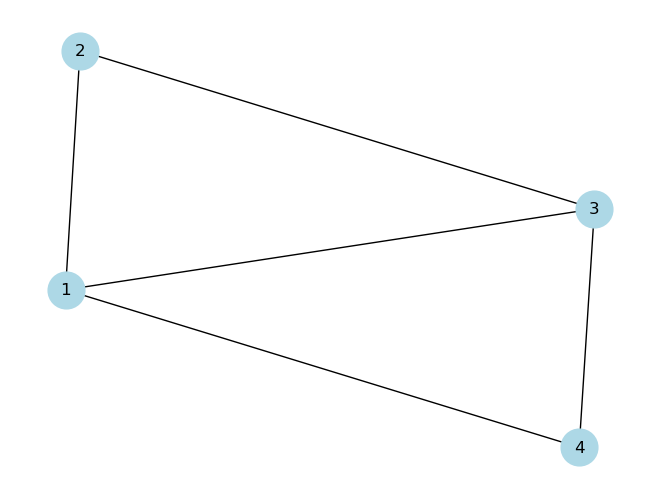

In [7]:
G = Graph()

edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]  
for e in edges:
    G.add_edge(e)

lex_order = G.lexBFS()
print("LexBFS order:", lex_order)
G.plot()

We start with all unvisited vertices:

1: [], 2: [], 3: [], 4: [].

Then, we choose 1, so labels change and 1 is visited:

order: [1]

2: [4], 3: [4], 4: [4]

Then, all lables are lexicographically the same, so we choose the least one, which is 2 and change labels:

order: [1, 2]

3: [4, 3], 4: [4]

Then, we choose 3, because it has greater label:

order: [1, 2, 3]

4: [4, 2]

We finish with order: [1, 2, 3, 4]

LexBFS order: [1, 2, 3, 4, 5]


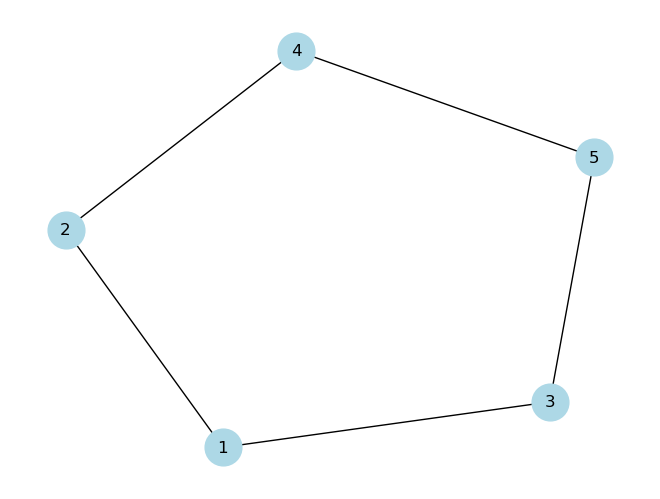

In [8]:
G2 = Graph()
edges = [(1,2), (1,3), (2,4), (3,5), (4,5)]
for e in edges:
    G2.add_edge(e)

lex_order = G2.lexBFS()
print("LexBFS order:", lex_order)
G2.plot()

We start with all unvisited vertices:

1: [], 2: [], 3: [], 4: [], 5: []

Then, we choose 1, so labels change and 1 is visited:

order: [1]

2: [5], 3: [5], 4: [], 5: []

Then, we choose the least one from 2 and 3, which is 2 and change labels:

order: [1, 2]

3: [5], 4: [4], 5: []

Then, we choose 3, because it has greater label:

order: [1, 2, 3]

4: [4], 5: [3]

Then, we choose 4, because it has greater label:

order: [1, 2, 3, 4]

5: [3, 2]

We finish with order: [1, 2, 3, 4, 5]

## Example usage of is_chordal and greedy colouring

Graph G is chordal.
PEO for coloring: [4, 3, 2, 1]
Greedy coloring result: {4: 1, 3: 2, 2: 1, 1: 3}


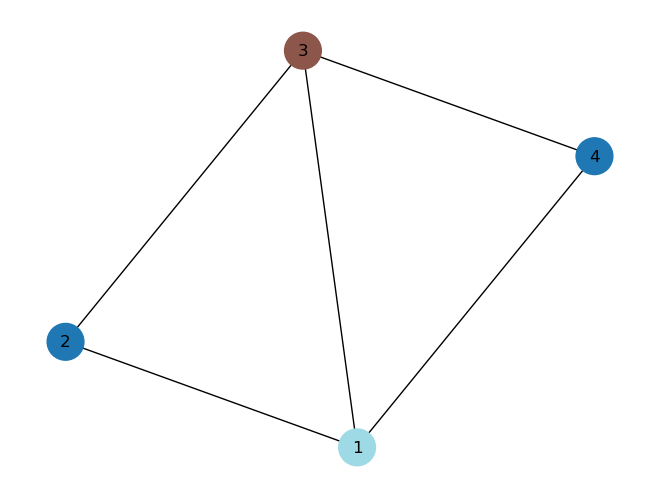

In [9]:
chordal, peo = G.is_chordal()

if chordal:
    print("Graph G is chordal.")
    print("PEO for coloring:", peo)

    coloring = G.greedy_coloring(peo)
    print("Greedy coloring result:", coloring)

    G.plot_coloured_graph(coloring)
else:
    print("Graph G is not chordal, greedy coloring along PEO not guaranteed optimal.")

In [10]:
chordal, peo = G2.is_chordal()

if chordal:
    print("Graph G2 is chordal.")
    print("PEO for coloring:", peo)

    coloring = G.greedy_coloring(peo)
    print("Greedy coloring result:", coloring)

    G.plot_coloured_graph(coloring)
else:
    print("Graph G2 is not chordal, greedy coloring along PEO not guaranteed optimal.")

Graph G2 is not chordal, greedy coloring along PEO not guaranteed optimal.


## More examples

In [15]:
# Graph 1: simple chordal graph (cycle 4 with a chord)
G1 = Graph()
edges1 = [(1,2), (2,3), (3,4), (4,1), (1,3)]
for e in edges1:
    G1.add_edge(e)

# Graph 2: non-chordal graph (cycle 5 without chords)
G2 = Graph()
edges2 = [(1,2), (2,3), (3,4), (4,5), (5,1)]
for e in edges2:
    G2.add_edge(e)

# Graph 3: chordal graph with more edges
G3 = Graph()
edges3 = [(1,2),(2,3),(3,4),(4,1),(1,3),(2,4)]
for e in edges3:
    G3.add_edge(e)

In [16]:
def check_and_color_graphs(graphs):
    """
    For each graph in a list, checks if it is chordal, prints PEO if exists,
    performs greedy coloring if chordal and visualizes the graph.
    """
    for i, G in enumerate(graphs, start=1):
        print(f"\nGraph {i}:")
        
        # Check chordality and get PEO
        chordal, peo = G.is_chordal()
        if chordal:
            print("Chordal: Yes")
            print("PEO:", peo)
            
            # Greedy coloring
            coloring = G.greedy_coloring(peo)
            print("Greedy coloring:", coloring)
            
            # Plot colored graph
            G.plot_coloured_graph(coloring)
        else:
            print("Chordal: No")
            print("Skipping coloring.")
            G.plot()


Graph 1:
Chordal: Yes
PEO: [4, 3, 2, 1]
Greedy coloring: {4: 1, 3: 2, 2: 1, 1: 3}


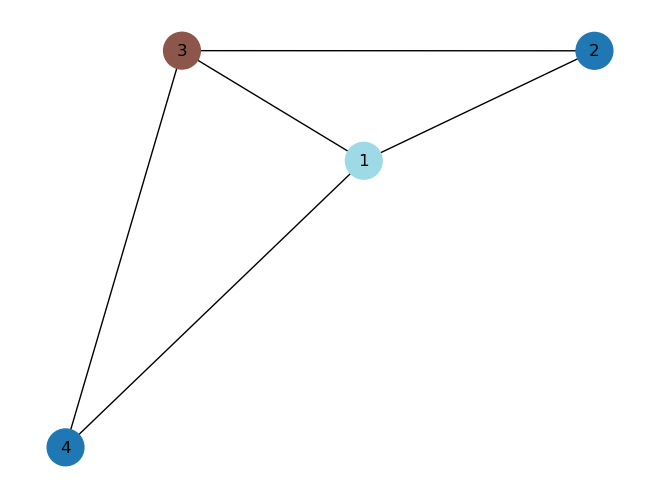


Graph 2:
Chordal: No
Skipping coloring.


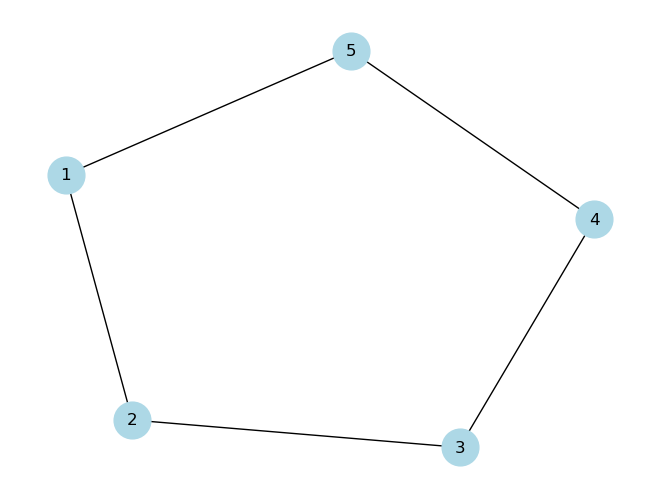


Graph 3:
Chordal: Yes
PEO: [4, 3, 2, 1]
Greedy coloring: {4: 1, 3: 2, 2: 3, 1: 4}


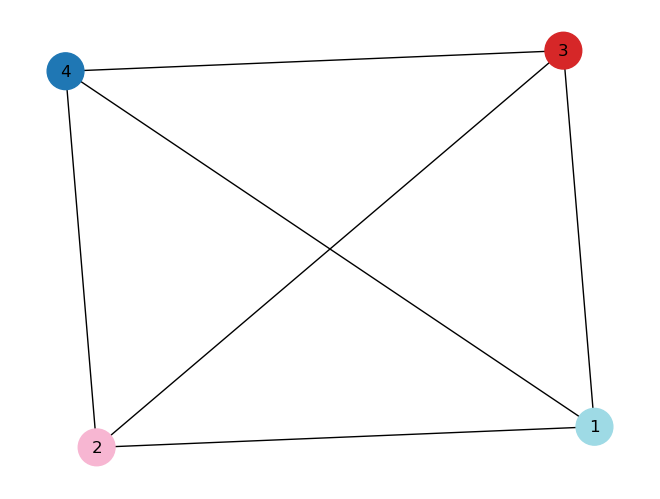

In [17]:
graphs = [G1, G2, G3]
check_and_color_graphs(graphs)